# Prepare data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger

In [3]:
from preparation import prepare_data

PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df = prepare_data(PATH)
df.head(5)

,video_title,channel_name,time
0,Тартак — Мене Вже Немає,Тартак,2022-08-16 10:28:54.733000+03:00
1,Марш Артилеріі,KOMU VNYZ - Topic,2022-08-16 10:26:14.418000+03:00
2,Is Ukraine selling off the free weapons we sen...,Legally Armed America,2022-08-16 09:47:28.248000+03:00
3,The Russian Military's Biggest Mistake So Far,Speak The Truth,2022-08-16 09:45:58.330000+03:00
4,Dealing with an overhugger,Viva La Dirt League,2022-08-16 09:37:18.524000+03:00


# 2. Explore

### 2.1 Count on how many videos you clicked per channel

In [4]:
counts = df["channel_name"].value_counts()
counts

STERNENKO                   215
Eurovision Song Contest     200
Viva La Dirt League          87
Adam Something               82
Beau of the Fifth Column     74
                           ... 
RUSSELL BLOG                  1
Neonvision                    1
ESC Europe                    1
Zanar Aesthetics              1
АрміяInform                   1
Name: channel_name, Length: 1354, dtype: Int64

### 2.2 Plot n most watched channels

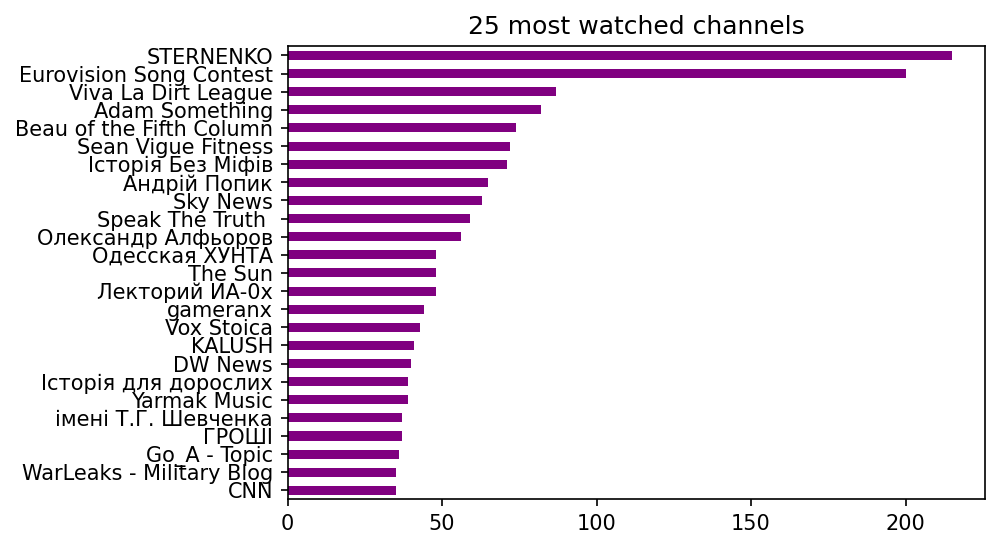

In [5]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()

In [6]:
top_n_channels

STERNENKO                   215
Eurovision Song Contest     200
Viva La Dirt League          87
Adam Something               82
Beau of the Fifth Column     74
Sean Vigue Fitness           72
Історія Без Міфів            71
Андрій Попик                 65
Sky News                     63
Speak The Truth              59
Олександр Алфьоров           56
Одесская ХУНТА               48
The Sun                      48
Лекторий ИА-0х               48
gameranx                     44
Vox Stoica                   43
KALUSH                       41
DW News                      40
Історія для дорослих         39
Yarmak Music                 39
імені Т.Г. Шевченка          37
ГРОШІ                        37
Go_A - Topic                 36
WarLeaks - Military Blog     35
CNN                          35
Name: channel_name, dtype: Int64

### 2.3 Count on how many videos you clicked per hour

<AxesSubplot:>

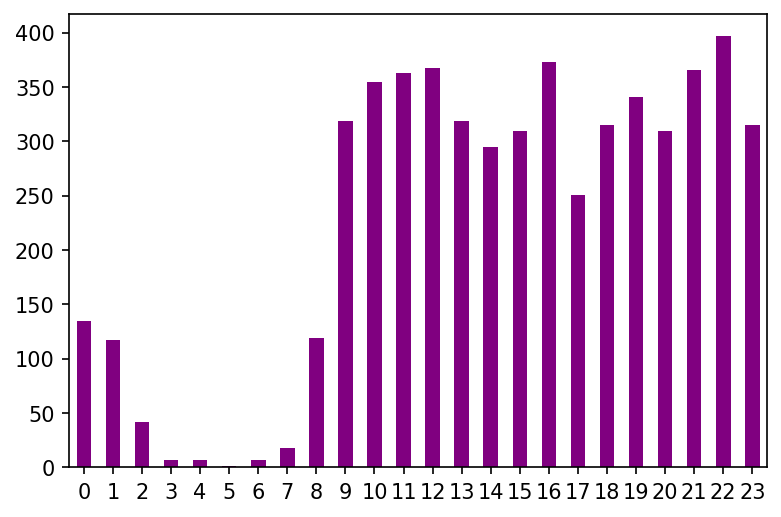

In [7]:
hours = pd.DatetimeIndex(df['time']).hour # get hours from datetime
hours = hours.value_counts().sort_index() # count on how many videos you clicked and sort hours from 0 to 23
hours.plot.bar(color="purple", rot=0)

### 2.4 Discover at what hours you watch a particular channel 

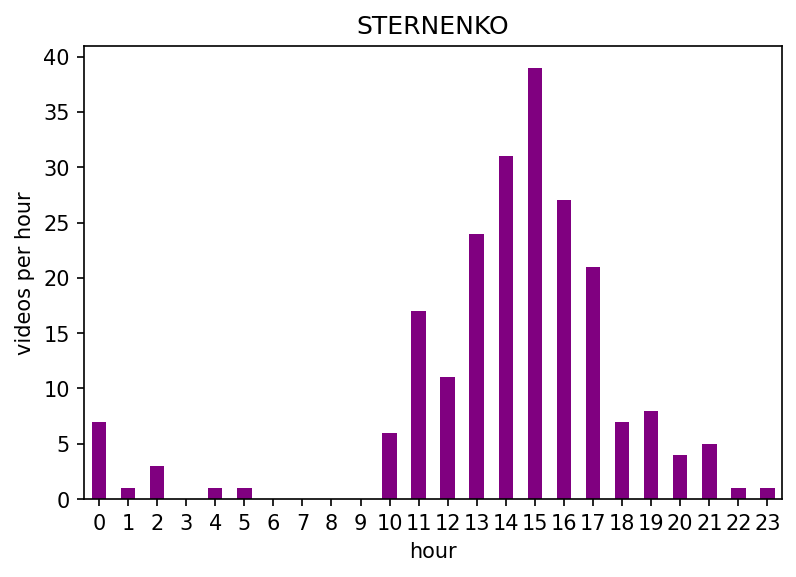

In [8]:
from plotting import one_channel_bar_plot_videos_per_h, get_videos_per_h_series

channel_name_to_look = "STERNENKO"
one_channel_bar_plot_videos_per_h(df, channel_name_to_look)


### 2.5 Plot videos count per hour for several channels

In [9]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels

['STERNENKO',
 'Eurovision Song Contest',
 'Viva La Dirt League',
 'Adam Something',
 'Beau of the Fifth Column',
 'Sean Vigue Fitness',
 'Історія Без Міфів',
 'Андрій Попик',
 'Sky News',
 'Speak The Truth ',
 'Олександр Алфьоров',
 'Одесская ХУНТА',
 'The Sun',
 'Лекторий ИА-0х',
 'gameranx',
 'Vox Stoica',
 'KALUSH',
 'DW News',
 'Історія для дорослих',
 'Yarmak Music',
 'імені Т.Г. Шевченка',
 'ГРОШІ',
 'Go_A - Topic',
 'WarLeaks - Military Blog',
 'CNN']

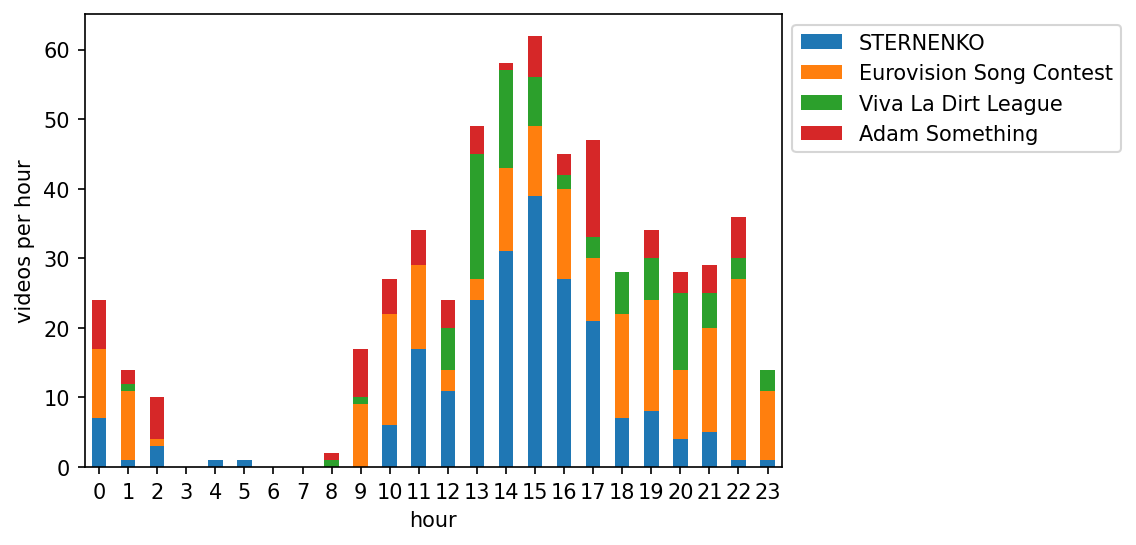

In [10]:
start_point = 0
interval = 4
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h_series(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h_series(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

### 2.6 Count how many videos you click per day of week

Mon    755
Tue    753
Wed    747
Thu    779
Fri    880
Sat    750
Sun    786
Name: weekday, dtype: int64

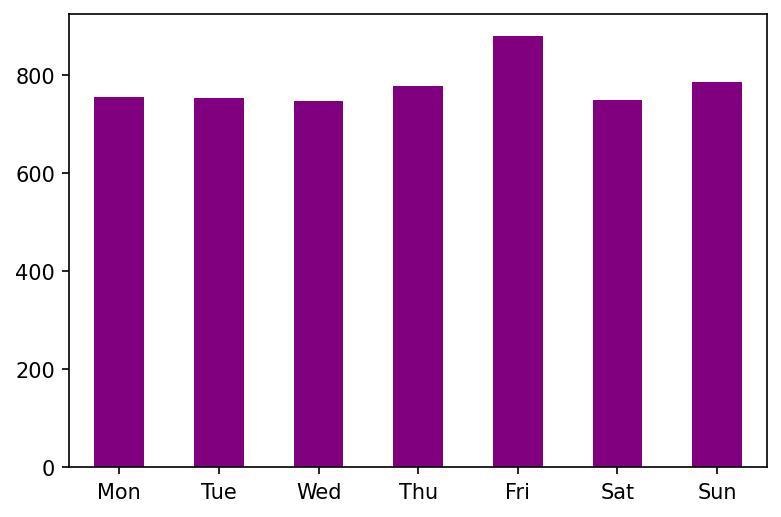

In [11]:
df['weekday'] = df['time'].dt.strftime('%a')
str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
videos_per_weekday = df["weekday"].value_counts()[str_week_days] # sort with custom index
videos_per_weekday.plot.bar(color="purple", rot=0)
videos_per_weekday

# Work with recent data (week, month?)

In [30]:
start_date = "2022-07-20"
# start_date = ""
end_date = df["time"].iloc[-1]
start_date, end_date

('2022-07-20', Timestamp('2022-04-06 12:22:51.507000+0300', tz='Europe/Kiev'))

In [31]:
mask = (df['time'] > start_date) & (df['time'] <= end_date)
df.loc[mask]

,video_title,channel_name,time,weekday


In [14]:
df.head()

,video_title,channel_name,time,weekday
0,Тартак — Мене Вже Немає,Тартак,2022-08-16 10:28:54.733000+03:00,Tue
1,Марш Артилеріі,KOMU VNYZ - Topic,2022-08-16 10:26:14.418000+03:00,Tue
2,Is Ukraine selling off the free weapons we sen...,Legally Armed America,2022-08-16 09:47:28.248000+03:00,Tue
3,The Russian Military's Biggest Mistake So Far,Speak The Truth,2022-08-16 09:45:58.330000+03:00,Tue
4,Dealing with an overhugger,Viva La Dirt League,2022-08-16 09:37:18.524000+03:00,Tue


### Plot n most watched channels based on the most recent data (week, month?)

In [12]:
whos

Variable                            Type           Data/Info
------------------------------------------------------------
PATH                                str            C:/Users/San/Documents/CS<...>istory/watch-history.json
ax                                  AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
channel_name_to_look                str            STERNENKO
counts                              Series         STERNENKO                <...>ength: 1354, dtype: Int64
df                                  DataFrame                               <...>\n[5450 rows x 4 columns]
df_data                             dict           n=1
df_top_n_channels                   DataFrame          STERNENKO  Eurovision<...>        3               0
end_point                           int            4
get_videos_per_h_series             function       <function get_videos_per_<...>es at 0x0000017D356D8430>
hours                               Series         0     135\n1     117\n2  <...>nName

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5450 entries, 0 to 5449
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype                      
---  ------        --------------  -----                      
 0   video_title   5450 non-null   string                     
 1   channel_name  5450 non-null   string                     
 2   time          5450 non-null   datetime64[ns, Europe/Kiev]
 3   weekday       5450 non-null   object                     
dtypes: datetime64[ns, Europe/Kiev](1), object(1), string(2)
memory usage: 170.4+ KB
